In [1]:
%env DB_HOST=mongodb://localhost/openpath_stage
import emission.core.get_database as edb
import emission.storage.timeseries.aggregate_timeseries as esta
import emission.storage.timeseries.builtin_timeseries as estb
import emission.core.get_database as gdb

env: DB_HOST=mongodb://localhost/openpath_stage
Config file not found, returning a copy of the environment variables instead...
Retrieved config: {'DB_HOST': 'mongodb://localhost/openpath_stage', 'DB_RESULT_LIMIT': None}
Connecting to database URL mongodb://localhost/openpath_stage


In [ ]:
pipeline_docs_cursor = gdb.get_timeseries_db().find({
    "metadata.key": "stats/pipeline_time",
})

# Display a sample of the documents
import pprint
pipeline_docs = list(pipeline_docs_cursor)
if pipeline_docs:
    single_doc = pipeline_docs[0]
    print("Single Document:")
    pprint.pprint(single_doc)
else:
    print("No documents found for 'stats/pipeline_time'.")

# Fetch multiple documents
pipeline_docs_sample = pipeline_docs[:5]  # Get first 5 documents
print("\nMultiple Documents:")
for doc in pipeline_docs_sample:
    pprint.pprint(doc)


In [3]:
import pandas as pd
from datetime import datetime, timedelta
import pytz

df = pd.json_normalize(pipeline_docs)
df.describe()


,metadata.write_ts,metadata.write_local_dt.year,metadata.write_local_dt.month,metadata.write_local_dt.day,metadata.write_local_dt.hour,metadata.write_local_dt.minute,metadata.write_local_dt.second,metadata.write_local_dt.weekday,data.ts,data.reading
count,5.326913e+06,5.326913e+06,5.326913e+06,5.326913e+06,5.326913e+06,5.326913e+06,5.326913e+06,5.326913e+06,5.326913e+06,5.326913e+06
mean,1.685975e+09,2.022934e+03,6.428264e+00,1.548050e+01,1.142917e+01,8.954388e+00,2.864050e+01,2.976993e+00,1.685975e+09,1.319386e+00
std,1.763656e+07,5.983031e-01,3.217985e+00,8.887693e+00,6.912154e+00,4.900127e+00,1.759540e+01,2.004307e+00,1.763656e+07,5.475244e+01
min,1.654741e+09,2.022000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.654741e+09,8.028001e-07
25%,1.674260e+09,2.023000e+03,4.000000e+00,8.000000e+00,5.000000e+00,6.000000e+00,1.300000e+01,1.000000e+00,1.674260e+09,1.932447e-02
50%,1.683742e+09,2.023000e+03,6.000000e+00,1.500000e+01,1.100000e+01,8.000000e+00,2.700000e+01,3.000000e+00,1.683742e+09,3.155020e-02
75%,1.690978e+09,2.023000e+03,9.000000e+00,2.300000e+01,1.700000e+01,1.000000e+01,4.500000e+01,5.000000e+00,1.690978e+09,9.972160e-02
max,1.733296e+09,2.024000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01,6.000000e+00,1.733296e+09,6.434377e+04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326913 entries, 0 to 5326912
Data columns (total 18 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   _id                               object 
 1   user_id                           object 
 2   metadata.key                      object 
 3   metadata.platform                 object 
 4   metadata.write_ts                 float64
 5   metadata.time_zone                object 
 6   metadata.write_local_dt.year      int64  
 7   metadata.write_local_dt.month     int64  
 8   metadata.write_local_dt.day       int64  
 9   metadata.write_local_dt.hour      int64  
 10  metadata.write_local_dt.minute    int64  
 11  metadata.write_local_dt.second    int64  
 12  metadata.write_local_dt.weekday   int64  
 13  metadata.write_local_dt.timezone  object 
 14  metadata.write_fmt_time           object 
 15  data.name                         object 
 16  data.ts                           fl

In [5]:
name = df['data.name'].unique()
print(name)

['ACCURACY_FILTERING' 'TRIP_SEGMENTATION' 'SECTION_SEGMENTATION'
 'JUMP_SMOOTHING' 'CLEAN_RESAMPLING' 'MODE_INFERENCE' 'LABEL_INFERENCE'
 'EXPECTATION_POPULATION' 'CREATE_CONFIRMED_OBJECTS' 'OUTPUT_GEN'
 'USERCACHE' 'USER_INPUT_MATCH_INCOMING' 'CREATE_COMPOSITE_OBJECTS'
 'TRIP_SEGMENTATION/segment_into_trips_dist/has_trip_ended'
 'GENERATE_STORE_AND_RANGE' 'STORE_USER_STATS'
 'TRIP_SEGMENTATION/segment_into_trips_dist/get_filtered_points_df'
 'TRIP_SEGMENTATION/segment_into_trips_dist/mark_valid'
 'TRIP_SEGMENTATION/segment_into_trips_dist/get_transition_df'
 'TRIP_SEGMENTATION/segment_into_trips_dist/continue_just_ended'
 'TRIP_SEGMENTATION/segment_into_trips_dist/set_new_trip_start_point'
 'TRIP_SEGMENTATION/get_time_series'
 'TRIP_SEGMENTATION/get_time_range_for_segmentation'
 'TRIP_SEGMENTATION/create_time_filter'
 'TRIP_SEGMENTATION/create_dist_filter' 'TRIP_SEGMENTATION/get_data_df'
 'TRIP_SEGMENTATION/handle_out_of_order_points'
 'TRIP_SEGMENTATION/get_filters_in_df'
 'TRIP_SEGM

# YES I KNOW WE CAN USE `estt.TimeQuery` BUT THIS IS THE PRIOR VERSION

In [6]:
import pandas as pd

# Step 1: Filter for rows where data.name is "USERCACHE"
usercache_df = df[df['data.name'] == "USERCACHE"]

# Step 2: Convert metadata.write_ts to datetime
usercache_df['datetime'] = pd.to_datetime(usercache_df['metadata.write_ts'], unit='s')

# Step 3: Define the start date for filtering
start_date = pd.Timestamp('2024-11-08')  # Adjust as needed

# Step 4: Filter for rows since the start date
usercache_df = usercache_df[usercache_df['datetime'] >= start_date]

# Step 5: Group by hour and count executions
hourly_execution_counts = usercache_df.groupby(usercache_df['datetime'].dt.floor('H')).size()

# Step 6: Output the results
if hourly_execution_counts.empty:
    print("No executions of 'USERCACHE' since November 8.")
else:
    print("Hourly execution counts since November 8:")
    print(hourly_execution_counts)


Hourly execution counts since November 8:
datetime
2024-11-08 00:00:00    82
2024-11-08 01:00:00    82
2024-11-08 02:00:00    82
2024-11-08 03:00:00    82
2024-11-08 04:00:00    82
                       ..
2024-12-04 03:00:00    82
2024-12-04 04:00:00    82
2024-12-04 05:00:00    82
2024-12-04 06:00:00    82
2024-12-04 07:00:00    82
Length: 631, dtype: int64


/var/folders/8j/284cnbzn2tzbfljhtsr17gsx2490jk/T/ipykernel_24541/2658015995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usercache_df['datetime'] = pd.to_datetime(usercache_df['metadata.write_ts'], unit='s')


In [7]:
import pandas as pd
import os


# Step 0: Define the list of 'data.name' entries to exclude
# These are the 'Parent' functions
exclude_data_names = [
    'TRIP_SEGMENTATION/segment_into_trips',
    'TRIP_SEGMENTATION/segment_into_trips_dist/loop'
]

# Step 1: Filter for function-level data only (entries with slashes in 'data.name') and exclude specified names
function_level_df = df[
    df['data.name'].str.contains('/') &
    ~df['data.name'].isin(exclude_data_names)
].copy()

# Step 2: Select the relevant columns
selected_columns = function_level_df[['data.reading', 'data.name']].copy()

# Step 3: Data Cleaning
# Drop rows with missing values in 'data.reading' or 'data.name'
selected_columns.dropna(subset=['data.reading', 'data.name'], inplace=True)

# Ensure 'data.reading' is numeric
selected_columns = selected_columns[pd.to_numeric(selected_columns['data.reading'], errors='coerce').notnull()]


# Step 5: Aggregate 'data.reading' by 'data.name'

# Aggregation Using Sum
aggregated_sum = selected_columns.groupby('data.name', as_index=False)['data.reading'].sum()
aggregated_sum.rename(columns={'data.reading': 'total_reading'}, inplace=True)

# Aggregation Using Mean
aggregated_mean = selected_columns.groupby('data.name', as_index=False)['data.reading'].mean()
aggregated_mean.rename(columns={'data.reading': 'average_reading'}, inplace=True)

# Step 6: Determine the 80th percentile threshold based on aggregated values

# For Sum Aggregation
threshold_sum = aggregated_sum['total_reading'].quantile(0.80)

# For Mean Aggregation
threshold_mean = aggregated_mean['average_reading'].quantile(0.80)

# Step 7: Split the DataFrame into top 20% and bottom 80% based on aggregated values

# Using Sum Aggregation
top20_sum = aggregated_sum[aggregated_sum['total_reading'] >= threshold_sum].sort_values(by='total_reading', ascending=False)
bottom80_sum = aggregated_sum[aggregated_sum['total_reading'] < threshold_sum].sort_values(by='total_reading', ascending=False)

# Using Mean Aggregation
top20_mean = aggregated_mean[aggregated_mean['average_reading'] >= threshold_mean].sort_values(by='average_reading', ascending=False)
bottom80_mean = aggregated_mean[aggregated_mean['average_reading'] < threshold_mean].sort_values(by='average_reading', ascending=False)

# Step 8: Define the base directory and file paths
base_dir = os.getcwd()  # Current working directory

# Paths for Sum Aggregation
aggregated_sum_path = os.path.join(base_dir, 'aggregated_sum_function_level.csv')
top20_sum_path = os.path.join(base_dir, 'top20_function_level_sum_sorted.csv')
bottom80_sum_path = os.path.join(base_dir, 'bottom80_function_level_sum_sorted.csv')

# Paths for Mean Aggregation
aggregated_mean_path = os.path.join(base_dir, 'aggregated_mean_function_level.csv')
top20_mean_path = os.path.join(base_dir, 'top20_function_level_mean_sorted.csv')
bottom80_mean_path = os.path.join(base_dir, 'bottom80_function_level_mean_sorted.csv')

# Step 9: Save the aggregated and categorized DataFrames to CSV files

# Saving Sum Aggregation
aggregated_sum.to_csv(aggregated_sum_path, index=False)
top20_sum.to_csv(top20_sum_path, index=False)
bottom80_sum.to_csv(bottom80_sum_path, index=False)

print(f"Aggregated Sum Function-Level Data saved to {aggregated_sum_path}")
print(f"Top 20% (Sum) function-level data saved to {top20_sum_path}")
print(f"Bottom 80% (Sum) function-level data saved to {bottom80_sum_path}")

# Saving Mean Aggregation
aggregated_mean.to_csv(aggregated_mean_path, index=False)
top20_mean.to_csv(top20_mean_path, index=False)
bottom80_mean.to_csv(bottom80_mean_path, index=False)

print(f"\nAggregated Mean Function-Level Data saved to {aggregated_mean_path}")
print(f"Top 20% (Mean) function-level data saved to {top20_mean_path}")
print(f"Bottom 80% (Mean) function-level data saved to {bottom80_mean_path}")

# Step 10: Verify the splits
print(f"\nSum Aggregation - Top 20% row count: {len(top20_sum)}")
print(f"Sum Aggregation - Bottom 80% row count: {len(bottom80_sum)}")

print(f"\nMean Aggregation - Top 20% row count: {len(top20_mean)}")
print(f"Mean Aggregation - Bottom 80% row count: {len(bottom80_mean)}")

# Step 11: Inspect some entries
print("\nSample Top 20% Sum Aggregation Entries:")
print(top20_sum.head())

print("\nSample Bottom 80% Sum Aggregation Entries:")
print(bottom80_sum.head())

print("\nSample Top 20% Mean Aggregation Entries:")
print(top20_mean.head())

print("\nSample Bottom 80% Mean Aggregation Entries:")
print(bottom80_mean.head())


Aggregated Sum Function-Level Data saved to /Users/rsimpson/e-mission-server/aggregated_sum_function_level.csv
Top 20% (Sum) function-level data saved to /Users/rsimpson/e-mission-server/top20_function_level_sum_sorted.csv
Bottom 80% (Sum) function-level data saved to /Users/rsimpson/e-mission-server/bottom80_function_level_sum_sorted.csv

Aggregated Mean Function-Level Data saved to /Users/rsimpson/e-mission-server/aggregated_mean_function_level.csv
Top 20% (Mean) function-level data saved to /Users/rsimpson/e-mission-server/top20_function_level_mean_sorted.csv
Bottom 80% (Mean) function-level data saved to /Users/rsimpson/e-mission-server/bottom80_function_level_mean_sorted.csv

Sum Aggregation - Top 20% row count: 4
Sum Aggregation - Bottom 80% row count: 14

Mean Aggregation - Top 20% row count: 4
Mean Aggregation - Bottom 80% row count: 14

Sample Top 20% Sum Aggregation Entries:
                                            data.name  total_reading
14  TRIP_SEGMENTATION/segment_int

In [8]:
def average_pipeline_time(combined_df):
    avg_time_df = combined_df.groupby('data.name')['data.reading'].mean().reset_index()
    avg_time_df.rename(columns={'data.reading': 'average_time'}, inplace=True)
    
    print("\nAverage Pipeline Time per Step:")
    print(avg_time_df.sort_values(by='average_time', ascending=False))
    
    # Optionally, save to CSV
    avg_time_df.to_csv('average_pipeline_time_per_step.csv', index=False)

average_pipeline_time(df)


Average Pipeline Time per Step:
                                            data.name  average_time
21               TRIP_SEGMENTATION/segment_into_trips    126.917013
29     TRIP_SEGMENTATION/segment_into_trips_dist/loop    124.689962
14          TRIP_SEGMENTATION/create_places_and_trips     14.225332
12                                  TRIP_SEGMENTATION      4.526685
8                                      MODE_INFERENCE      4.478387
9                                          OUTPUT_GEN      4.475956
2                            CREATE_COMPOSITE_OBJECTS      3.632218
10                               SECTION_SEGMENTATION      1.886151
16                      TRIP_SEGMENTATION/get_data_df      1.560728
24  TRIP_SEGMENTATION/segment_into_trips_dist/get_...      1.535270
26  TRIP_SEGMENTATION/segment_into_trips_dist/get_...      0.648574
6                                      JUMP_SMOOTHING      0.641427
1                                    CLEAN_RESAMPLING      0.535116
34             

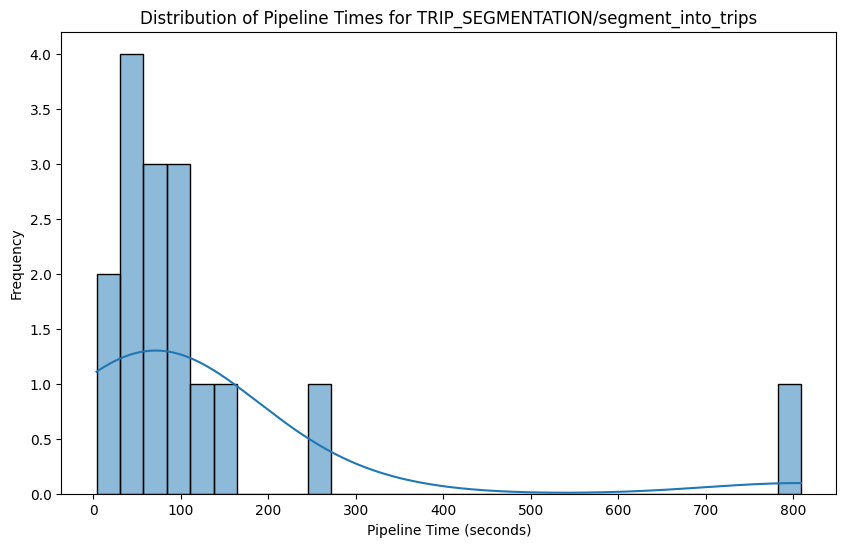

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def pipeline_time_distribution(combined_df, step_name):
    step_df = combined_df[combined_df['data.name'] == step_name]
    
    if step_df.empty:
        print(f"No data found for step: {step_name}")
        return
    
    plt.figure(figsize=(10,6))
    sns.histplot(step_df['data.reading'], bins=30, kde=True)
    plt.title(f"Distribution of Pipeline Times for {step_name}")
    plt.xlabel("Pipeline Time (seconds)")
    plt.ylabel("Frequency")
    plt.show()

pipeline_time_distribution(df, 'TRIP_SEGMENTATION/segment_into_trips')

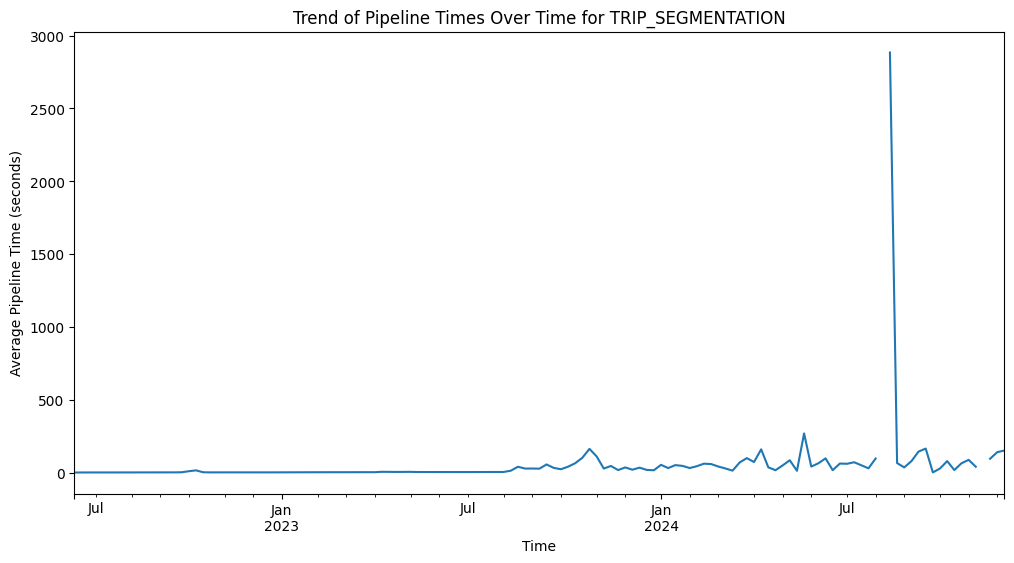

In [17]:
def pipeline_time_trends(combined_df, step_name, freq='D'):
    """
    Plots the trend of pipeline times over time for a specific step.
    :param freq: Resampling frequency ('D' for daily, 'W' for weekly, 'M' for monthly)
    """
    step_df = combined_df[combined_df['data.name'] == step_name].copy()
    
    if step_df.empty:
        print(f"No data found for step: {step_name}")
        return
    
    # Convert timestamp to datetime
    step_df['datetime'] = pd.to_datetime(step_df['metadata.write_ts'], unit='s')
    
    # Set datetime as index
    step_df.set_index('datetime', inplace=True)
    
    # Resample and calculate mean pipeline time
    resampled = step_df['data.reading'].resample(freq).mean()
    
    # Plotting
    plt.figure(figsize=(12,6))
    resampled.plot()
    plt.title(f"Trend of Pipeline Times Over Time for {step_name}")
    plt.xlabel("Time")
    plt.ylabel("Average Pipeline Time (seconds)")
    plt.show()

pipeline_time_trends(df, 'TRIP_SEGMENTATION', 'W')


Top 5 Bottleneck Pipeline Steps:
                                            data.name  average_time
1           TRIP_SEGMENTATION/create_places_and_trips     14.225332
3                       TRIP_SEGMENTATION/get_data_df      1.560728
10  TRIP_SEGMENTATION/segment_into_trips_dist/get_...      1.535270
12  TRIP_SEGMENTATION/segment_into_trips_dist/get_...      0.648574
7        TRIP_SEGMENTATION/handle_out_of_order_points      0.021092


/var/folders/8j/284cnbzn2tzbfljhtsr17gsx2490jk/T/ipykernel_24541/3552898157.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_time', y='data.name', data=bottlenecks, palette='viridis')


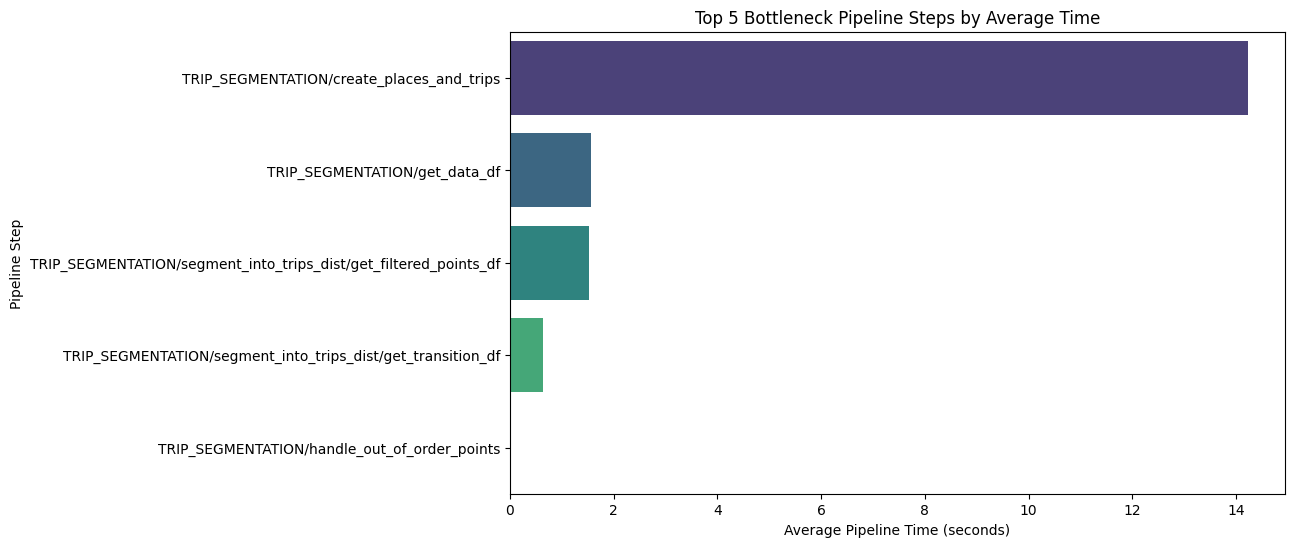

In [19]:
def identify_bottlenecks(combined_df, top_n=5):
    avg_time_df = combined_df.groupby('data.name')['data.reading'].mean().reset_index()
    avg_time_df.rename(columns={'data.reading': 'average_time'}, inplace=True)
    
    bottlenecks = avg_time_df.sort_values(by='average_time', ascending=False).head(top_n)
    
    print(f"\nTop {top_n} Bottleneck Pipeline Steps:")
    print(bottlenecks)
    
    # Optionally, visualize
    plt.figure(figsize=(10,6))
    sns.barplot(x='average_time', y='data.name', data=bottlenecks, palette='viridis')
    plt.title(f"Top {top_n} Bottleneck Pipeline Steps by Average Time")
    plt.xlabel("Average Pipeline Time (seconds)")
    plt.ylabel("Pipeline Step")
    plt.show()

identify_bottlenecks(function_level_df)

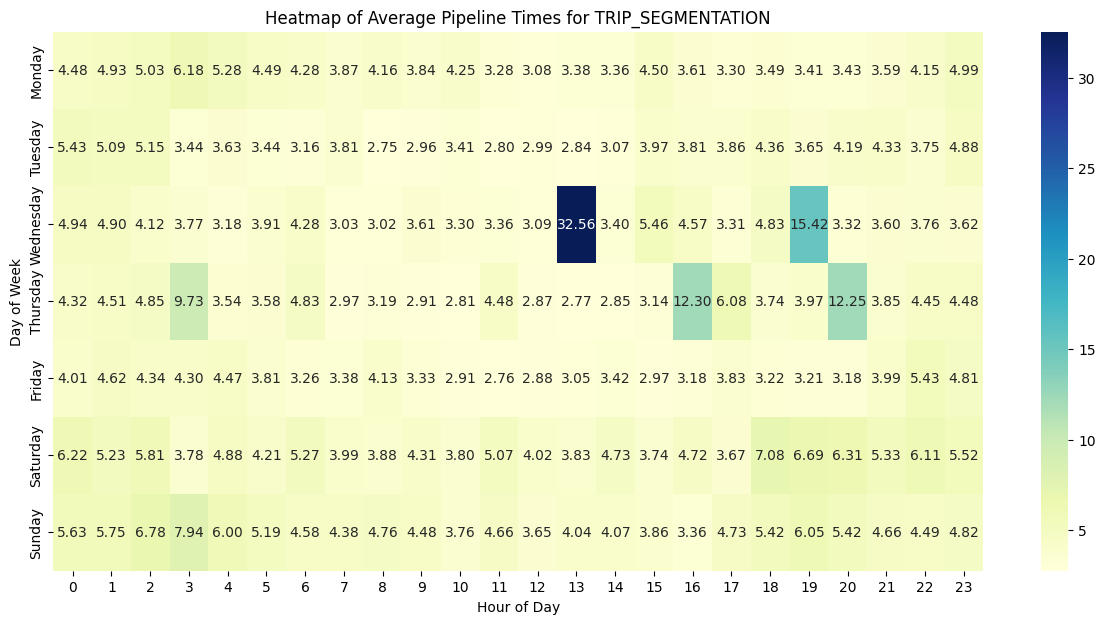

In [23]:
def heatmap_pipeline_times(combined_df, step_name):
    step_df = combined_df[combined_df['data.name'] == step_name].copy()
    
    if step_df.empty:
        print(f"No data found for step: {step_name}")
        return
    
    # Convert timestamp to datetime
    step_df['datetime'] = pd.to_datetime(step_df['metadata.write_ts'], unit='s')
    
    # Extract hour and day of week
    step_df['hour'] = step_df['datetime'].dt.hour
    step_df['day_of_week'] = step_df['datetime'].dt.day_name()
    
    # Create pivot table
    pivot = step_df.pivot_table(values='data.reading', index='day_of_week', columns='hour', aggfunc='mean')
    
    # Reorder days of the week
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    pivot = pivot.reindex(days_order)
    
    # Plot heatmap
    plt.figure(figsize=(15,7))
    sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".2f")
    plt.title(f"Heatmap of Average Pipeline Times for {step_name}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.show()


heatmap_pipeline_times(df, 'TRIP_SEGMENTATION')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

def define_pipeline_executions(df):
    grouped = df.groupby(['user_id', 'metadata.key'])
    pipeline_executions = []
    
    for (user_id, key), group in grouped:
        execution = {
            'user_id': user_id,
            'pipeline_key': key,
            'start_time': group['metadata.write_ts'].min(),
            'end_time': group['metadata.write_ts'].max(),
            'total_time': group['data.reading'].sum(),
            'num_steps': group.shape[0],
            'steps': list(group.sort_values('metadata.write_ts')['data.name']),
            'steps_reading': list(group.sort_values('metadata.write_ts')['data.reading'])
        }
        pipeline_executions.append(execution)
    
    executions_df = pd.DataFrame(pipeline_executions)
    return executions_df


# combined_pipeline_df is  DataFrame with all users' data
executions_df = define_pipeline_executions(df)
print("Pipeline Executions Defined:")
print(executions_df.head())



Execution Time Variability per Pipeline Step:
                                            data.name  average_time_sec  \
1           TRIP_SEGMENTATION/create_places_and_trips         14.225332   
10  TRIP_SEGMENTATION/segment_into_trips_dist/get_...          1.535270   
3                       TRIP_SEGMENTATION/get_data_df          1.560728   
14  TRIP_SEGMENTATION/segment_into_trips_dist/has_...          0.014075   
12  TRIP_SEGMENTATION/segment_into_trips_dist/get_...          0.648574   
7        TRIP_SEGMENTATION/handle_out_of_order_points          0.021092   
16  TRIP_SEGMENTATION/segment_into_trips_dist/post...          0.008482   
4                 TRIP_SEGMENTATION/get_filters_in_df          0.001911   
5   TRIP_SEGMENTATION/get_time_range_for_segmentation          0.007696   
8   TRIP_SEGMENTATION/segment_into_trips_dist/chec...          0.003463   
9   TRIP_SEGMENTATION/segment_into_trips_dist/cont...          0.000532   
15  TRIP_SEGMENTATION/segment_into_trips_dist/mark...

/var/folders/8j/284cnbzn2tzbfljhtsr17gsx2490jk/T/ipykernel_24541/2154522427.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='data.reading', y='data.name', data=df, palette='coolwarm')


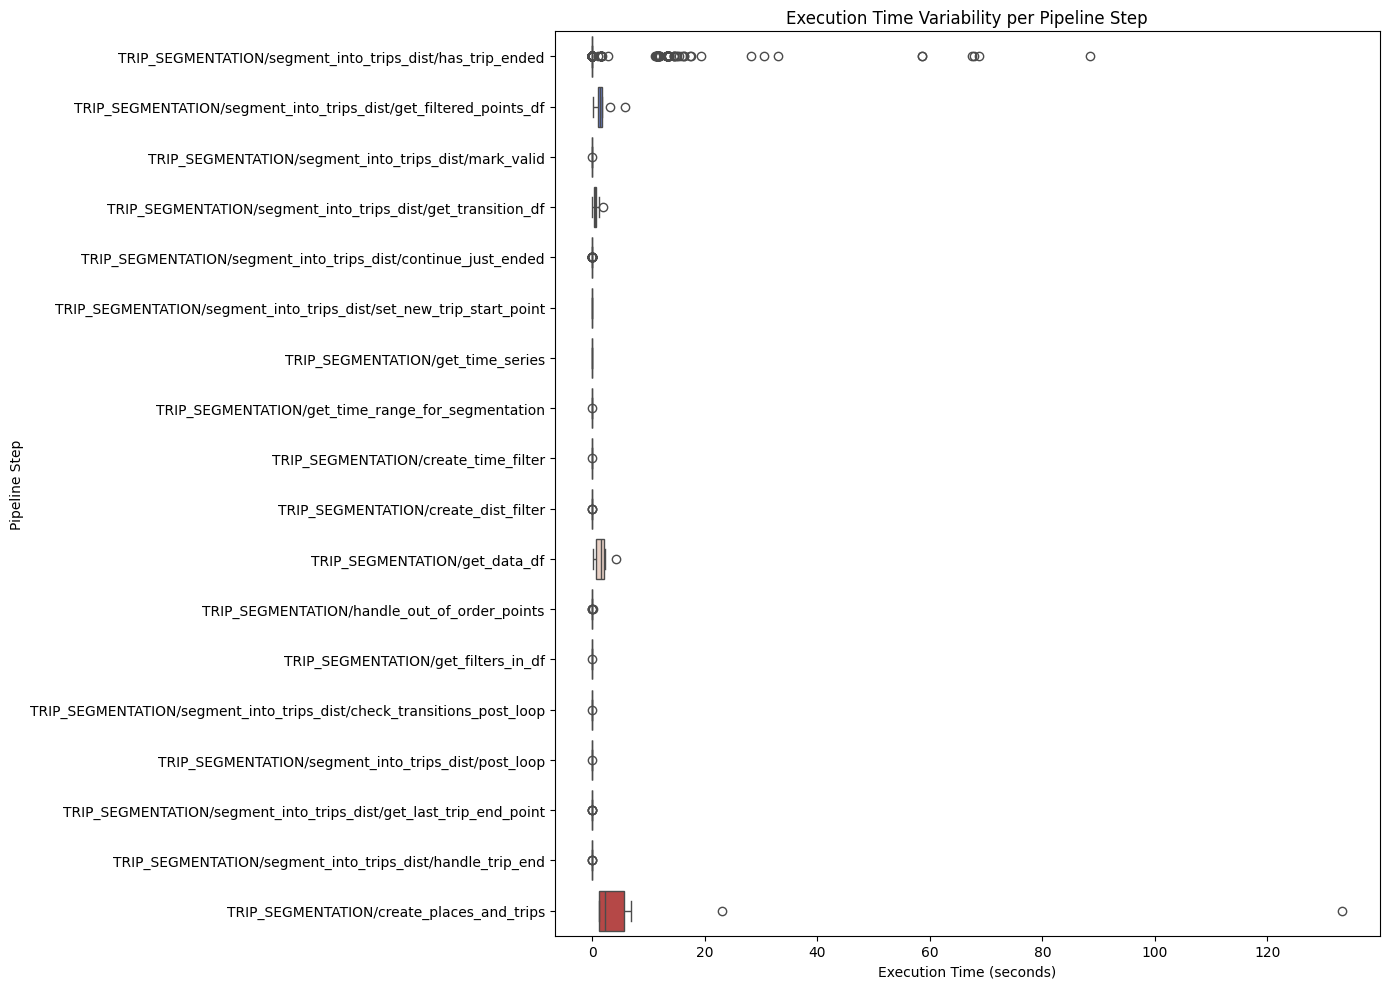

Saved execution time variability to 'execution_time_variability_per_step.csv'


In [40]:
def execution_time_variability_per_step(df):
    variability_df = df.groupby('data.name')['data.reading'].agg(['mean', 'std', 'var']).reset_index()
    variability_df.rename(columns={'mean': 'average_time_sec', 'std': 'std_dev_sec', 'var': 'variance_sec2'}, inplace=True)
    
    # Sort by standard deviation descending
    variability_df = variability_df.sort_values(by='std_dev_sec', ascending=False)
    
    print("\nExecution Time Variability per Pipeline Step:")
    print(variability_df)
    
    # Visualization: Box Plots to visualize variability
    plt.figure(figsize=(14,10))
    sns.boxplot(x='data.reading', y='data.name', data=df, palette='coolwarm')
    plt.title("Execution Time Variability per Pipeline Step")
    plt.xlabel("Execution Time (seconds)")
    plt.ylabel("Pipeline Step")
    plt.tight_layout()
    plt.show()
    
    # Save to CSV
    variability_df.to_csv('execution_time_variability_per_step.csv', index=False)
    print("Saved execution time variability to 'execution_time_variability_per_step.csv'")


execution_time_variability_per_step(function_level_df)